# Dataset Sintético

Para poder probar el modelo de GMM desarrollado, vamos a crear un dataset sintético en una dimensión, con las siguientes características:

$p(x/z=0)\sim \mathcal{N}(5, 15)$

$p(x/z=1)\sim \mathcal{N}(10, 2)$

$P(z=0)=0.25$

$P(z=1)=0.75$

El objetivo es simular un dataset con n muestras y mediante EM clusterizarlas correctamente y determinar los parámetros. Para ello, el procedimiento más sencillo es simular una uniforme de n muestras. Las muestras cuyo valor de la uniforme sea menor que $p_1$, las asignamos a esa distribución y viceversa. Lo mísmo realizamos con la identidad del cluster. 

## Cargamos las Librerías

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.stats import norm

## Armar una clase dataset sintético

In [3]:
class SyntheticDataset(object):

    def __init__(self, mu, var, p, n_samples):
        
        n_uniform = np.random.uniform(0, 1, n_samples)
        x = np.zeros(n_uniform.shape)
        y = np.zeros(n_uniform.shape)

        x[n_uniform <= p] = np.random.normal(mu[0], var[0], x[n_uniform <= p].shape[0])
        x[n_uniform > p] = np.random.normal(mu[1], var[1], x[n_uniform > p].shape[0])
        y[n_uniform <= p] = 0
        y[n_uniform > p] = 1

        self.x = x
        self.y = y
        self.mu = mu
        self.var = var

    def split(self, percentage):  # 0.8
        
        X = self.x
        y = self.y

        permuted_idxs = np.random.permutation(X.shape[0])
        train_idxs = permuted_idxs[0:int(percentage * X.shape[0])]
        test_idxs = permuted_idxs[int(percentage * X.shape[0]): X.shape[0]]

        X_train = X[train_idxs]
        X_test = X[test_idxs]

        y_train = y[train_idxs]
        y_test = y[test_idxs]

        return X_train, X_test, y_train, y_test

In [5]:
# Creamos el dataset

# Establecemos los parámetros de las GMM
mu = np.array([5, 10])
var = np.array([15, 2])
p = 0.25

dataset = SyntheticDataset(mu, var, p, 500)
x_train, x_test, y_train, y_test = dataset.split(0.8)

In [9]:
x_train = x_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)

Text(0.5, 1.0, 'GMM')

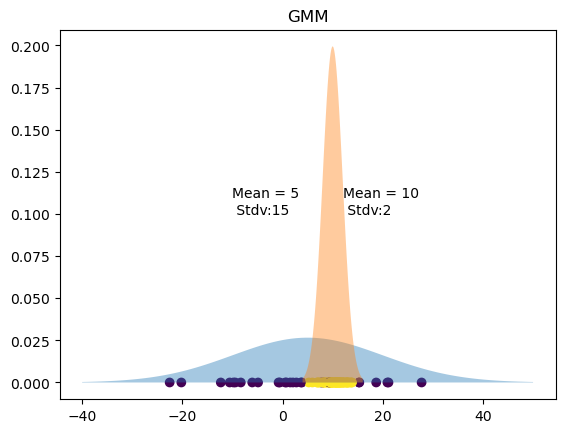

In [13]:
# Plots

mpl.rc_file_defaults()

f, ax = plt.subplots(1, 1, sharey='col', sharex='col')

ax.scatter(x_test[:, 0], np.zeros_like(x_test), c=y_test, alpha=1)
xr_1 = np.linspace(mu[0] - 3 * var[0], mu[0] + 3 * var[0], 100)
xr_2 = np.linspace(mu[1] - 3 * var[1], mu[1] + 3 * var[1], 100)
density_r1 = norm.pdf(xr_1, loc=mu[0], scale=var[0])
density_r2 = norm.pdf(xr_2, loc=mu[1], scale=var[1])
ax.fill_between(xr_1, density_r1, alpha=0.4)
ax.fill_between(xr_2, density_r2, alpha=0.4)
ax.text(mu[0] - 1 * var[0], 0.1, 'Mean = {media}\n Stdv:{std}'.format(media=mu[0], std=var[0]))
ax.text(mu[1] + 1 * var[1], 0.1, 'Mean = {media}\n Stdv:{std}'.format(media=mu[1], std=var[1]))
ax.set_title('GMM')